# Shifted Rastrigin function minimization

The goal is to optimize (minimize more precisely) the shifted-Rastrigin's cost function which has an high number of local minimums

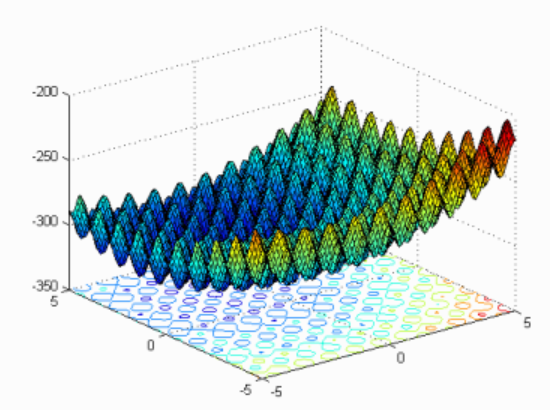

In [1]:
# Import necessaries librairies
import numpy as np
from math import cos,pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize,dual_annealing
# if not installed
#!pip install autograd
from autograd import grad, jacobian
import time

In [2]:
#Define a bias for the function
f_bias = -330
d50 = 50
shift  = np.random.uniform(-5,5,d50)

In [3]:
def shifted_rastrigin(x):
    """Shifted-Rastrigin objective function.

    Has a global minimum at -330 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray"""
    
    z = x - shift
    #j = sum(x**2 - 10*cos(2*pi*x)+ 10)
    j = np.sum(z**2 - 10*np.cos(2*np.pi*z)) + 10*np.size(z)    

    return j + f_bias

In [4]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-5,5,d50)

In [5]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -5 * np.ones(d50)
max_bound_50 = 5 * np.ones(d50)
bounds_50 = (min_bound_50, max_bound_50)

In [6]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x,fobj,context):
    fobj = shifted_rastrigin(x)
    history.append(fobj)

In [7]:
# Compute derivative of the function
jacobian_cost = jacobian(shifted_rastrigin)

In [8]:
#Set maximum number of iterations
MAX_ITER = 2000

In [9]:
res_jac_50 = minimize(shifted_rastrigin, x_0_50,method='SLSQP', options={'disp': True, 'maxiter': MAX_ITER})
res_jac_50

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 219.21176401540174
            Iterations: 61
            Function evaluations: 3329
            Gradient evaluations: 61


     fun: 219.21176401540174
     jac: array([ 0.01586914, -0.00850677, -0.00666046,  0.05198669,  0.09021759,
        0.02239227, -0.04447174, -0.03212738, -0.00196838, -0.03697205,
       -0.0110321 ,  0.01251221, -0.00138092, -0.01109314,  0.06549072,
        0.021698  , -0.01290131,  0.01908875, -0.03530884,  0.02580261,
        0.00808716, -0.00340271,  0.01369476, -0.02239227,  0.00235748,
        0.03574371, -0.00326538,  0.00092316, -0.00023651, -0.00138855,
       -0.00131989, -0.04615784, -0.03884125, -0.00621796,  0.00474548,
        0.00143433,  0.02855682,  0.00595856, -0.01276398,  0.01791382,
        0.03662872, -0.03762817, -0.01254272,  0.00112915, -0.00940704,
        0.01072693,  0.01554871, -0.01128387, -0.04582214,  0.08354187])
 message: 'Optimization terminated successfully.'
    nfev: 3329
     nit: 61
    njev: 61
  status: 0
 success: True
       x: array([-3.59603716,  4.68707102,  2.69637093,  2.19949484, -0.12645269,
        1.18397868,  3.86930276,  0.5220

In [10]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -5.12 * np.ones(d50)
max_bound_50 = 5.12 * np.ones(d50)
bounds_50 = list(zip(min_bound_50, max_bound_50))

In [11]:
start_time = time.time()
res_50 = dual_annealing(shifted_rastrigin,callback=callbackf,bounds=bounds_50,initial_temp=4e5, maxiter= 1000,seed=1234,x0=x_0_50)
res_50
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.927382946014404 seconds ---


In [12]:
#Print result of the optimization for the Rastrigin function (dimension 50) 
res_50

     fun: -329.9999999999991
 message: ['Maximum number of iteration reached']
    nfev: 116780
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([ 2.37349596,  0.70730394,  3.69133337,  3.19432272,  0.86827889,
        4.16877462, -1.10527419,  4.50190751, -0.40591046,  1.61289557,
       -4.15671189, -1.53004129, -3.9421063 , -2.70650603, -2.97399193,
        4.50365254,  4.66647104,  1.72121866,  0.78274222, -4.6717629 ,
        2.13364193,  2.0162334 ,  1.5156647 , -1.19045795,  3.57073109,
        2.55462993,  2.6812568 , -1.97244208,  3.43109094, -2.5907428 ,
        3.60777186, -3.21345654,  2.44559457, -3.29800231, -2.26733916,
       -1.87763295,  1.99419626,  1.09112199, -3.49931969,  2.2098669 ,
       -0.63644435, -2.29819204, -0.65848063, -0.95055555,  4.66880669,
       -2.05027141,  2.05643938, -1.84205089,  4.71090127, -3.19979975])

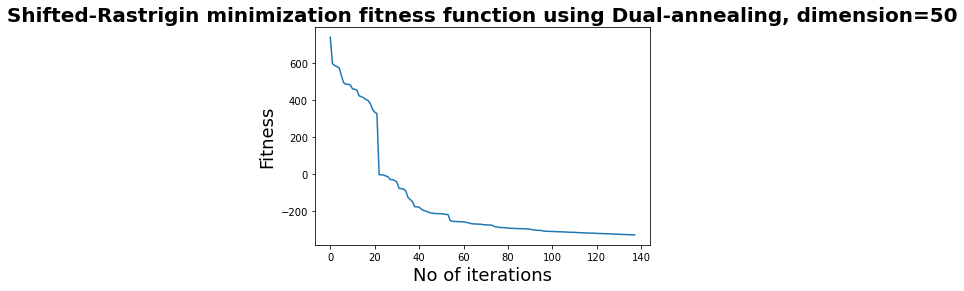

In [13]:
# Plot value of the fitness function 
plt.title("Shifted-Rastrigin minimization fitness function using Dual-annealing, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [14]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [15]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = list(zip(min_bound_500, max_bound_500))

In [26]:
start_time = time.time()
res_500 = dual_annealing(shifted_rastrigin,callback=callbackf,bounds=bounds_500,initial_temp=4e5, maxiter=2000,seed=1234,x0=x_0_500)
print("--- %s seconds ---" % (time.time() - start_time))

--- 386.72663712501526 seconds ---


In [27]:
res_500

     fun: -231.49905334766845
 message: ['Maximum number of iteration reached']
    nfev: 4080655
    nhev: 0
     nit: 2000
    njev: 0
  status: 0
 success: True
       x: array([ 96.33533898,  35.14221716, -77.9745795 ,  67.06053174,
       -14.01462476,  15.26017482, -93.88534648,  98.62592238,
        32.53912003, -35.45180866, -21.07503785,  59.94321463,
        65.74978613,  69.54769456, -77.83752728,  23.33344059,
       -69.69055633,  -8.89034393,  44.08791653, -58.1974037 ,
       -19.11507537, -69.23870579, -53.96521002,  95.76392085,
        -1.92277055,  59.74715047,  10.70143182,  46.38214458,
       -51.7073981 , -49.01313162,  27.96077039,  52.21634371,
        84.59141787, -96.72227026,  98.82956862,  34.57244815,
         5.00577647, -48.58028729,  28.49608975,  83.37823964,
        65.91411977, -50.89747421,  46.71731519, -42.34823563,
       -79.61372131,  81.57814411, -85.66814665,   3.92343014,
       -95.32027639, -69.31709031,  56.41319391, -14.92396059,
       

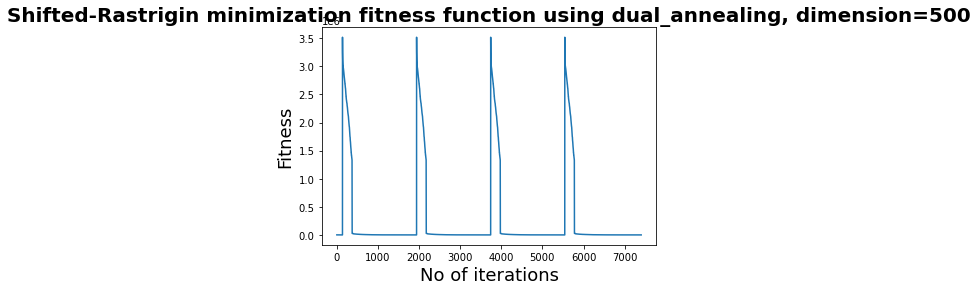

In [25]:
# Plot value of the fitness function 
plt.title("Shifted-Rastrigin minimization fitness function using dual_annealing, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold before successful termination.

The selected algorithm for this task is dual_annealing. It belongs to the global optimum algorithm and uses a temperature parameter to potentially accept "bad" solutions to investigate the search space and not be trapped into a local optimum.